# Exercise on Regression

## Exercise 1: Linear Regression on Cancer-Data

### Least-Square, Lasso, Ridge and PCR regression on Cancer Data

In this exercise we'll check the difference in the application of different regression algorithms.

The **goal** is **to predict** the association between **prostate specific antigen (PSA)** and several **clinical measures** that are potentially associated with PSA in men who were about to receive a radical prostatectomy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import, preprocess and visualize the data

### Import
The cancer data presents information about the clinical measures of men before a prostatectomy and the results of the prostatectomy:

- Target:
    - lpsa: log PSA score (This can be read by a doctor to assess the risk of prostate cancer)
- Measurements:
    - lcavol: log cancer volume
    - lweight: log prostate weight
    - age: age of patient
    - lbph: log of the amount of benign prostatic hyperplasia
    - svi: seminal vesicle invasion
    - lcp: log of capsular penetration
    - gleason: Gleason score
    - pgg45: percent of Gleason scores 4 or 5

In [2]:
data = pd.read_csv('cancer_data.txt', sep='\t', index_col=0) # The entire dataset
names = data.columns.values.tolist()

X = np.array(data.iloc[:,:-2]) # Matrix of the features
y = np.array(data.iloc[:,-2]) # Matrix of the target

X_name = names[:-2]
y_name = names[-2]

df = pd.DataFrame(data)
df.head(10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F
8,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415,T
9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,F
10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F


### Preprocess and visualize

We need to preprocess the data. 

**To do**:
    
- Preprocess the data : 
    - Split the dataset in train and test data. Test should be at least 20% of the total dataset size
    - Center and scale
- Visualize the scaled data: Target Vs Measurements
    
**Hint:** 

- To split the dataset, use the function train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- To center and scale, use the function StandardScaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create the test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale and center the data
scalerX = StandardScaler()

X_std_train = scalerX.fit_transform(X_train)
X_std_test  = scalerX.fit_transform(X_test)


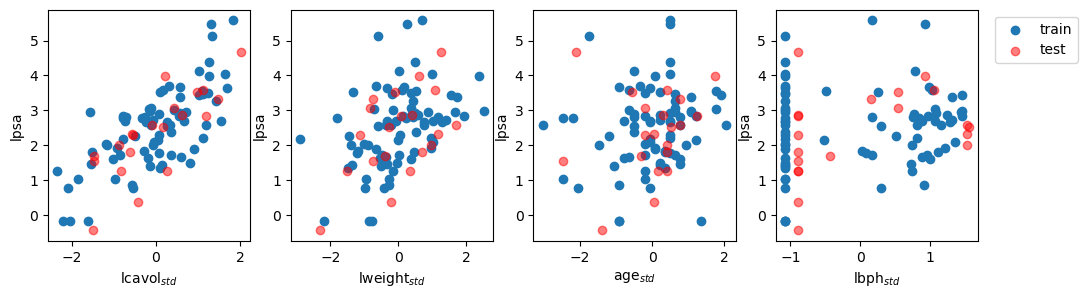

In [4]:
Nmeas = 4
fig, axs = plt.subplots(1,Nmeas, figsize=(Nmeas*3,3))
for i in range(Nmeas):
    axs[i].scatter(X_std_train[:,i], y_train, label = 'train')
    axs[i].scatter(X_std_test[:,i], y_test, c='r', alpha=0.5, label='test')
    axs[i].set_xlabel(str(X_name[i] + '$_{std}$') )
    axs[i].set_ylabel(y_name)
axs[Nmeas-1].legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

## Least-Squares regression

The objective function of a least-squares problem $ y \approx f(X) = \beta X$ is:

$\hat{\beta}^{LS} = \textit{argmin}\{ || y - f(X) ||^2 \} = \textit{argmin}\{ || y -  \beta X ||^2 \} $ 


- **To do:**
    - use the function `LinearRegression` to fit the regression model to the data.
    - calculate the predictions and the R2 score of the prediction
    - Plot the prediction and test on the measurement-target space
    - Plot the predicted values against the observed ones (parity plot).

- **Hint:**
    - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - A simple user guide on the different linear regression models can be found here: https://scikit-learn.org/stable/modules/linear_model.html


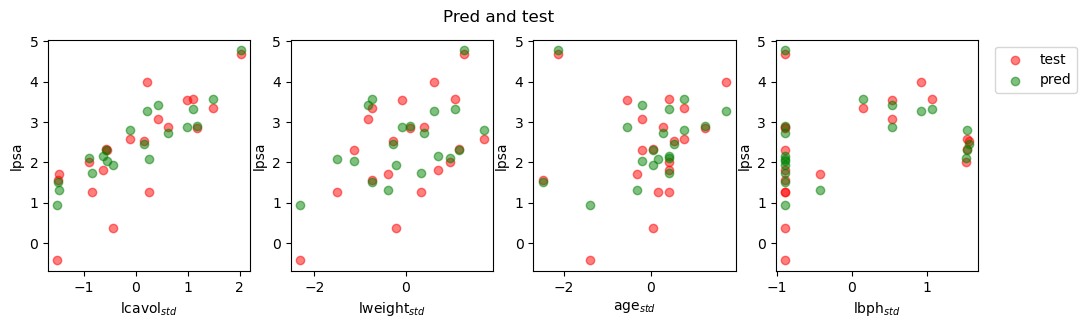

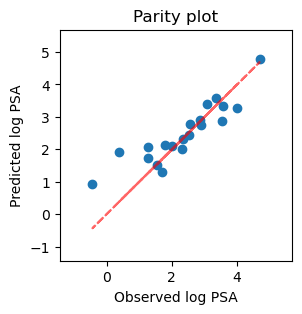

In [5]:
from sklearn.linear_model import LinearRegression

# Create the linear regression object
LS_reg = LinearRegression().fit(X_std_train, y_train)

# Predict the y_test from the test measurements
y_pred_LS = LS_reg.predict(X_std_test)

# Calculate LS R2 score
LS_score = LS_reg.score(X_std_test, y_test)

# Plot the prediction and test on the measurement-target space
Nmeas = 4
fig, axs = plt.subplots(1,Nmeas, figsize=(Nmeas*3,3))
plt.suptitle('Pred and test')
for i in range(Nmeas):
    axs[i].scatter(X_std_test[:,i], y_test,    c='r', alpha=0.5, label='test')
    axs[i].scatter(X_std_test[:,i], y_pred_LS, c='g', alpha=0.5, label='pred')
    axs[i].set_xlabel(str(X_name[i] + '$_{std}$') )
    axs[i].set_ylabel(y_name)
axs[Nmeas-1].legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

# Parity plot:  predicted values agains the test values 
plt.figure(figsize=(3,3))
plt.title('Parity plot')
plt.scatter(y_test, y_pred_LS)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()


## Lasso regression

The objective function of a least-squares problem $ y \approx f(X) = \beta X$ is:

$\hat{\beta}^{Lasso} = \textit{argmin}\{ || y -  \beta X ||^2 +  \alpha ||\beta||_1 \}  $ 


- **To do:**
    - use the function `Lasso` to fit the regression model to the data (Use your choice for the `alpha` parameter)
    - Compare LS and Lasso: weights and R2 of the regression.
    - Which `alpha` would you choose?

- **Hint:**
    - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


In [6]:
from sklearn.linear_model import Lasso

# Create the Lasso object
Lasso_reg   = Lasso(alpha=0.1).fit(X_std_train, y_train)

# Predict the y_test from the test measurements
y_pred_Lasso = Lasso_reg.predict(X_std_test)

# Compute the score
Lasso_score = Lasso_reg.score(X_std_test, y_test)

print(f'LS coefficients  :  {np.round(LS_reg.coef_, 3)}')
print(f'Lasso coefficients: {np.round(Lasso_reg.coef_, 3)}')
print('')

print('LS score:    ' + str(np.round(LS_score,2)))
print('Lasso score: ' + str(np.round(Lasso_score,2)))

LS coefficients  :  [ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
Lasso coefficients: [ 0.554  0.18  -0.     0.     0.201  0.     0.     0.   ]

LS score:    0.76
Lasso score: 0.68


Comparative plots LS-Lasso at different alphas. 

- **To do:**
    - Uncomment the following lines 
    - Select the "alphas" desired to test

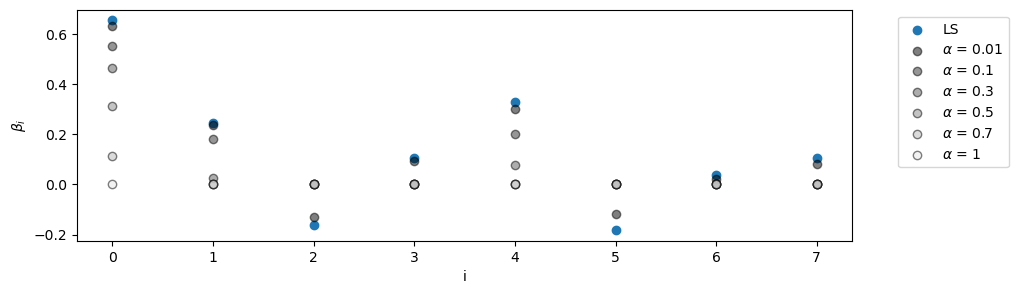

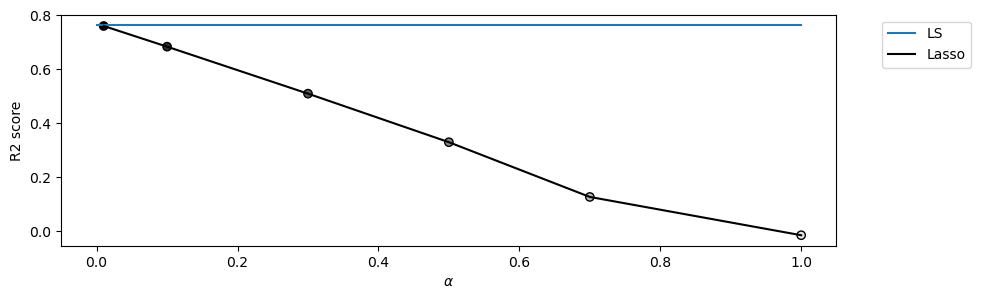

In [7]:
# Comparative plots LS- Lasso at different 

alphas = [0.01, 0.1, 0.3, 0.5, 0.7, 1]
n_alpha= len(alphas)
colors = plt.cm.gray(np.linspace(0, 0.9, n_alpha))

# Coefficients plot
n_coef = len(LS_reg.coef_)
Lasso_coefs = np.zeros((n_alpha, n_coef))
Lasso_scores = np.zeros((n_alpha, 1))


for i, alpha in enumerate(alphas):
    # Create the Lasso Regression object
    Lasso_reg = Lasso(alpha= alpha).fit(X_std_train, y_train)

    # Predict the y_test from the test measurements
    y_pred_Lasso = Lasso_reg.predict(X_std_test)

    # Save coefficients
    Lasso_coefs[i,:] = Lasso_reg.coef_
    
    # Compute and save R2 scores
    Lasso_score = Lasso_reg.score(X_std_test, y_test)
    Lasso_scores[i]=Lasso_score
    

# Coefficients Plot
plt.figure(figsize=(10,3))
plt.scatter(range(n_coef),LS_reg.coef_   , label='LS')
for i, alpha in enumerate(alphas):
    plt.scatter(range(n_coef),Lasso_coefs[i,:], color=colors[i],
                label=r'$\alpha$ = ' +str(alpha), alpha=0.5, edgecolor='k')

plt.xlabel('i')
plt.ylabel(r'$\beta_i$')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()


# Score Plot
plt.figure(figsize=(10,3))
plt.plot([0,1], LS_score*np.array([1,1])    , label='LS')
plt.plot(alphas, Lasso_scores , '-', c='k' , label='Lasso')
plt.scatter(alphas, Lasso_scores , c=colors , edgecolor='k')

plt.xlabel(r'$\alpha$')
plt.ylabel('R2 score')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()



Why?

The penalty on the L1 norm is used to promote the sparsity of the regression weights.
- Higher `alpha` -> Simpler model (More sparse)
- Lower  `alpha` -> More complex model but it may overfit

To infer the **optimum** value of $\alpha$ to apply we can use the **cross-validation**:

- **To do:**
    - use the function LassoCV to fit the regression model to the data.
    - Parity plot 
    - Compare the LassoCV alpha parameter to the one you selected in the exercise before.

- **Hint:**
    - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
    - Use the function's attribute to obtain the optimal alpha.

LS      coefficients: [ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
LassoCV coefficients: [ 0.565  0.192 -0.     0.014  0.219  0.     0.     0.002]

LS      score: 0.76
LassoCV score: 0.7

LassoCV alpha: 0.076


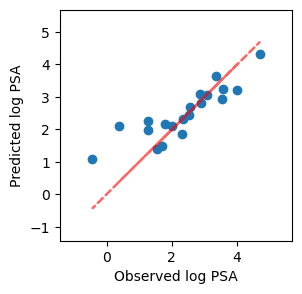

In [8]:
from sklearn.linear_model import LassoCV

# Create the Lasso CV object
LassoCV_reg = LassoCV(cv=5, random_state=42).fit(X_std_train, y_train)

# Predict the y_test from the test measurements
y_pred_LassoCV = LassoCV_reg.predict(X_std_test)

# Compute the score
LassoCV_score = LassoCV_reg.score(X_std_test, y_test)

# Display the results
print(f'LS      coefficients: {np.round(LS_reg.coef_, 3)}')
print(f'LassoCV coefficients: {np.round(LassoCV_reg.coef_, 3)}')
print('')

print('LS      score: ' + str(np.round(LS_score,2)))
print('LassoCV score: ' + str(np.round(LassoCV_score,2)))
print('')
print('LassoCV alpha: ' + str(np.round(LassoCV_reg.alpha_,4)))

# Parity Plot
plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_LassoCV)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()

## RidgeCV regression 

The objective function of a least-squares problem $ y \approx f(X) = \beta X$ is:

$\hat{\beta}^{Ridge} = \textit{argmin}\{ || y -  \beta X ||^2 +  \alpha ||\beta||_2^2 \}  $ 


- **To do:**
    - Use the function `RidgeCV` to fit the regression model.
    - Compare LS and RidgeCV: weights and R2 of the regression.
    - Parity Plot

- **Hint:**
    - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
    

LS      coefficients: [ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
RidgeCV coefficients: [ 0.641  0.246 -0.154  0.102  0.321 -0.163  0.04   0.099]

LS      score: 0.76
RidgeCV score: 0.76

RidgeCV alpha: 1.0


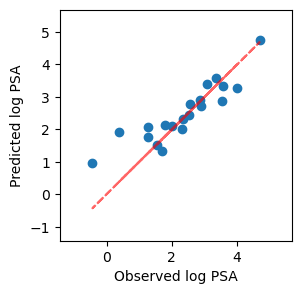

In [9]:
from sklearn.linear_model import RidgeCV

# Create the Ridge CV object
RidgeCV_reg = RidgeCV(alphas=(0.1, 0.5, 1, 5, 10, 50), cv=5).fit(X_std_train, y_train)

# Predict the y_test from the test measurements
y_pred_RidgeCV = RidgeCV_reg.predict(X_std_test)

# Compute the score
RidgeCV_score = RidgeCV_reg.score(X_std_test, y_test)

# Display the results
print(f'LS      coefficients: {np.round(LS_reg.coef_, 3)}')
print(f'RidgeCV coefficients: {np.round(RidgeCV_reg.coef_, 3)}')
print('')

print('LS      score: ' + str(np.round(LS_score,2)))
print('RidgeCV score: ' + str(np.round(RidgeCV_score,2)))
print('')
print('RidgeCV alpha: ' + str(np.round(RidgeCV_reg.alpha_,4)))


# Parity Plot
plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_RidgeCV)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()


## Principal Components Regression (PCR)

Principal Components Regression consist on perfoming a linear regression (Least-Squares) on the PCs of the data. 

That is, the regression is performed in the projection of the data into the PCA basis: $\boldsymbol{Z}= \boldsymbol{XA}$

The regression problem is transformed:
 - from: finding $\beta$ in $ y \approx f(X) = \beta X$ 
 - to:   finding $\gamma$ in $ y \approx f(Z) = \gamma Z$ 
 
Therefore, the first step is performing PCA and then, regress $y$ knowing $Z$.

- **To do:**
    - Perform PCA. 
    - CAlculate the PC matrix ($A$) and the PC score matrix ($Z$)
    - Plot the explained variance ratio
    - Questions to reply:
        - In which dataset should we perfomed the PCA? 
        - How many PCs should we retain?
- **Hint:**
    - The function documentation is in: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


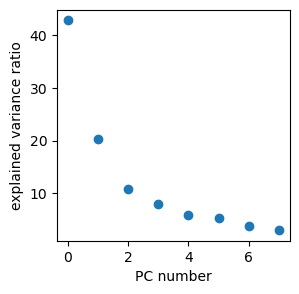

In [10]:
from sklearn.decomposition import PCA

# Perform the PCA
pca = PCA().fit(X_std_train)

# PC matrix and PC score matrices: A , Z_train, Z_test
A_train = pca.components_.T
Z_train = X_train @ A_train
Z_test  = X_test  @ A_train

# Plot the explained variance ratio
plt.figure(figsize=(3,3))
plt.scatter(np.arange(X.shape[1]), pca.explained_variance_ratio_*100)
plt.xlabel('PC number')
plt.ylabel('explained variance ratio')
plt.show()

- **To do:**
    - Build the PCR: Linear Regression: Z -> y
    - Compare LS and PCR: weights and R2 of the regression.
    - Parity Plot

LS  coefficients: [ 0.656  0.247 -0.16   0.104  0.328 -0.183  0.04   0.105]
PCR coefficients: [ 0.638  0.079 -0.705 -0.073 -0.056  0.042  0.367 -0.483]

LS  score: 0.76
PCR score: 0.76


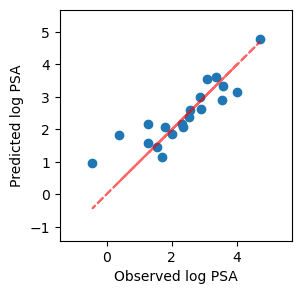

In [11]:
# Build the PCR: Linear Regression: Z-> y
PCR_reg = LinearRegression().fit(Z_train, y_train)

# Predict the y_test from the test measurements
y_pred_PCR = PCR_reg.predict(Z_test)

# Compute the score
PCR_score = PCR_reg.score(Z_test, y_test)


# Display the results
print(f'LS  coefficients: {np.round(LS_reg.coef_, 3)}')
print(f'PCR coefficients: {np.round(PCR_reg.coef_, 3)}')
print('')

print('LS  score: ' + str(np.round(LS_score,2)))
print('PCR score: ' + str(np.round(PCR_score,2)))

# Parity Plot
plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_PCR)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()

This added step has two benefits:

* The features become uncorrelated between them.
* The dimensionality of the feature matrix can be reduced.


- **To do:**
    - Modify the number of PC scores used in the regression and:
        - track the resulting R2 score.
        - track the parity plot


LS score: 0.76
PCR score: 0.72


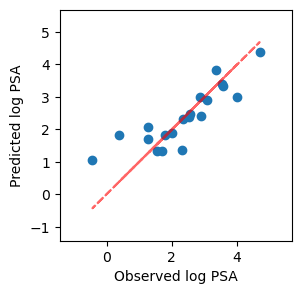

In [12]:
# We can test the regression with fewer features
q = 3
Z_train = X_train @ A_train[:,:q]
Z_test  = X_test  @ A_train[:,:q]

# Perform the regression and prediction
PCR_reg = LinearRegression().fit(Z_train, y_train)

y_pred_PCR = PCR_reg.predict(Z_test)

# Compare LS-PCR scores
PCR_score = PCR_reg.score(Z_test, y_test)

print('LS score: ' + str(np.round(LS_score,2)))
print('PCR score: ' + str(np.round(PCR_score,2)))

# Parity Plot
plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_PCR)
plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.show()



## Comparison: LS-LassoCV-RidgeCV-PCR

- Parity Plot
- Coefficients
- Test results and scores

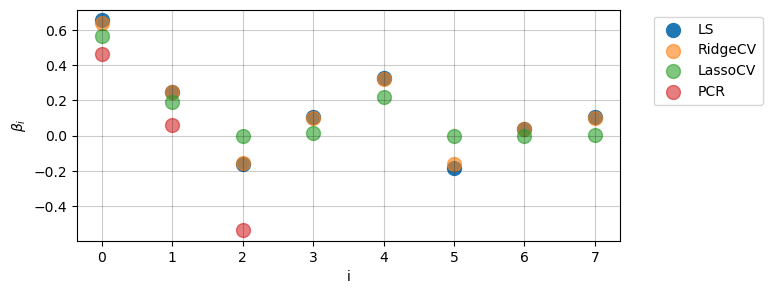

In [13]:
# Coefficients Plot
plt.figure(figsize=(7,3))
plt.scatter(range(n_coef),            LS_reg.coef_     , label='LS'      , s=100, alpha=1)
plt.scatter(range(n_coef),            RidgeCV_reg.coef_, label='RidgeCV' , s=100, alpha=0.6)
plt.scatter(range(n_coef),            LassoCV_reg.coef_, label='LassoCV' , s=100, alpha=0.6)
plt.scatter(range(len(PCR_reg.coef_)),PCR_reg.coef_    , label='PCR'     , s=100, alpha=0.6)

plt.grid(color='k', linestyle='-', alpha=0.2)
plt.xlabel('i')
plt.ylabel(r'$\beta_i$')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()


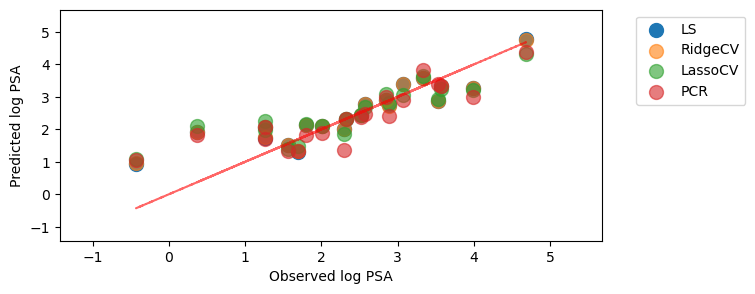

In [14]:
# Parity Plot
plt.figure(figsize=(7,3))
# plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_LS     ,label='LS'       , s=100, alpha=1)
plt.scatter(y_test, y_pred_RidgeCV, label='RidgeCV' , s=100, alpha=0.6)
plt.scatter(y_test, y_pred_LassoCV, label='LassoCV' , s=100, alpha=0.6)
plt.scatter(y_test, y_pred_PCR    , label='PCR'     , s=100, alpha=0.6)

plt.plot(y_test, y_test, c='r', alpha=0.6, ls='--')
plt.xlim(y_test.min()-1, y_test.max()+1)
plt.ylim(y_test.min()-1, y_test.max()+1)
plt.xlabel('Observed log PSA')
plt.ylabel('Predicted log PSA')
plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

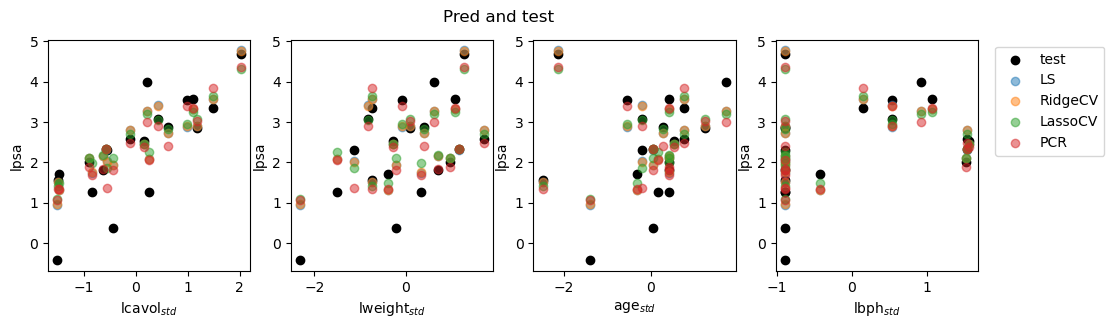

LS       score: 0.7631
RidgeCV  score: 0.7628
LassoCV  score: 0.7
PCR      score: 0.72


In [15]:
# Plot the prediction and test on the measurement-target space
Nmeas = 4
fig, axs = plt.subplots(1,Nmeas, figsize=(Nmeas*3,3))
plt.suptitle('Pred and test')
for i in range(Nmeas):
    axs[i].scatter(X_std_test[:,i], y_test,    c='k' , alpha=1 , label='test')
    axs[i].scatter(X_std_test[:,i], y_pred_LS        , alpha=0.5, label='LS')
    axs[i].scatter(X_std_test[:,i], y_pred_RidgeCV   , alpha=0.5, label='RidgeCV')
    axs[i].scatter(X_std_test[:,i], y_pred_LassoCV   , alpha=0.5, label='LassoCV')
    axs[i].scatter(X_std_test[:,i], y_pred_PCR       , alpha=0.5, label='PCR')
    axs[i].set_xlabel(str(X_name[i] + '$_{std}$') )
    axs[i].set_ylabel(y_name)
axs[Nmeas-1].legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

# Scores
print('LS       score: ' + str(np.round(LS_score,4)))
print('RidgeCV  score: ' + str(np.round(RidgeCV_score,4)))
print('LassoCV  score: ' + str(np.round(LassoCV_score,2)))
print('PCR      score: ' + str(np.round(PCR_score,2)))
